# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Multiclass (Iris Data Set)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

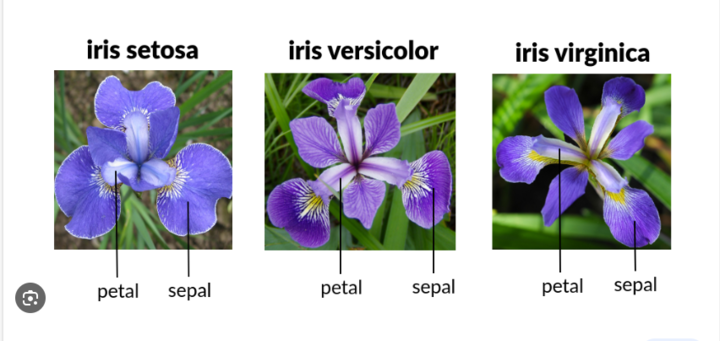

# Iris Veri Seti Hakkında

Iris veri seti, makine öğrenmesi ve istatistik alanlarında sıkça kullanılan klasik bir veri setidir. İlk olarak 1936 yılında Ronald Fisher tarafından tanıtılmıştır ve çiçekçilik alanında sıklıkla karşılaşılan üç farklı Iris çiçeği türünü (Iris setosa, Iris virginica ve Iris versicolor) ayırt etmek için kullanılır.

## Veri Setinin İçeriği

Veri seti, her biri 50 örnekten oluşan üç Iris türüne ait toplam 150 çiçek örneğini içerir. Her bir çiçek örneği için dört özellik (feature) ölçülmüştür:

1. **sepal_length**: Çiçeğin sepal (taç yaprağını koruyan dış yaprak) bölümünün uzunluğu.
2. **sepal_width**: Çiçeğin sepal bölümünün genişliği.
3. **petal_length**: Çiçeğin petal (renkli, gösterişli çiçek yaprağı) bölümünün uzunluğu.
4. **petal_width**: Çiçeğin petal bölümünün genişliği.

Bu özellikler, her bir Iris türünü birbirinden ayırt etmek için kullanılır.

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0         5.100        3.500         1.400        0.200  setosa
1         4.900        3.000         1.400        0.200  setosa
2         4.700        3.200         1.300        0.200  setosa
3         4.600        3.100         1.500        0.200  setosa
4         5.000        3.600         1.400        0.200  setosa

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

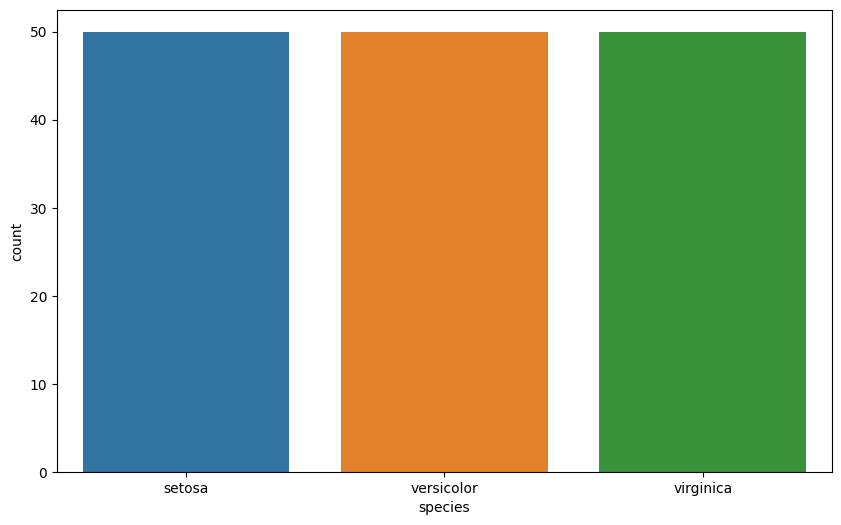

In [6]:
sns.countplot(df["species"]);

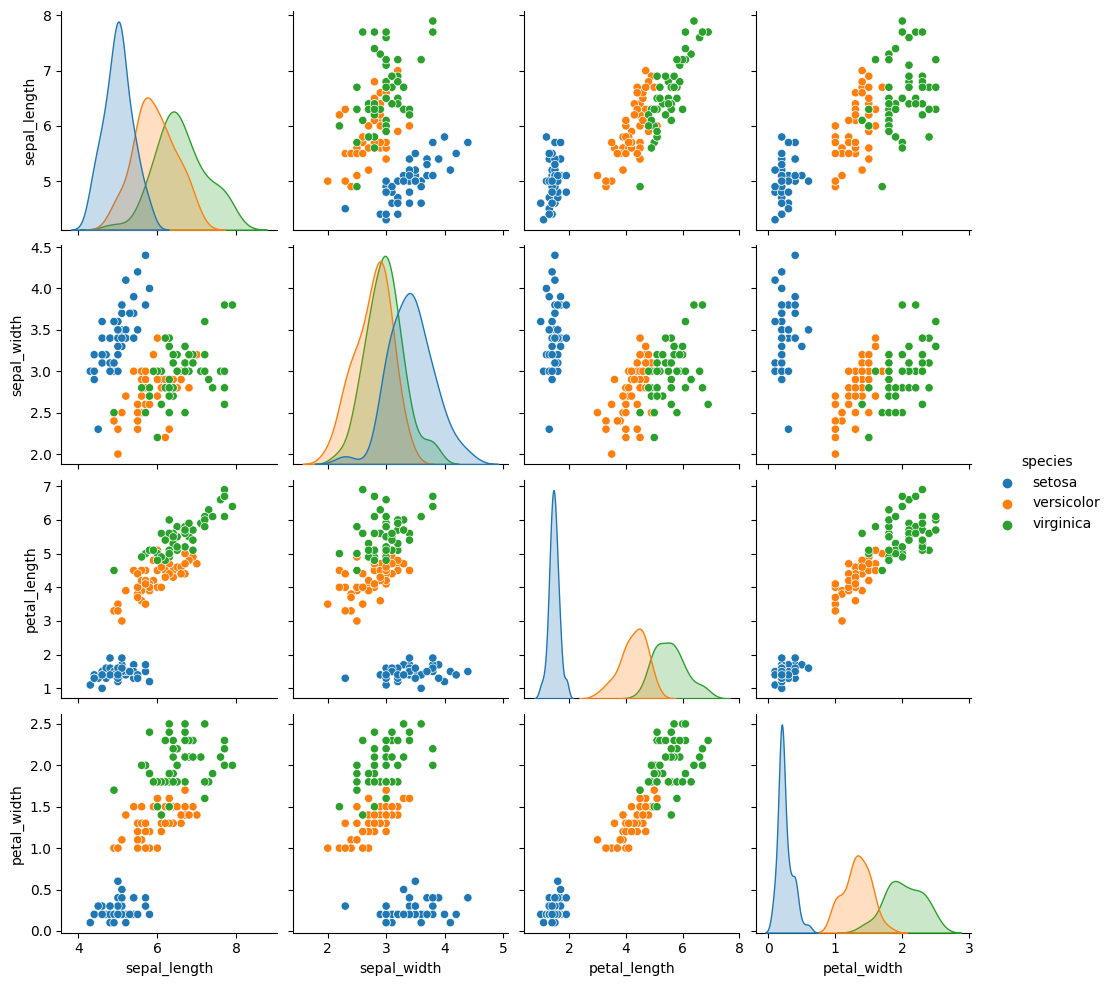

In [7]:
sns.pairplot(df, hue="species");

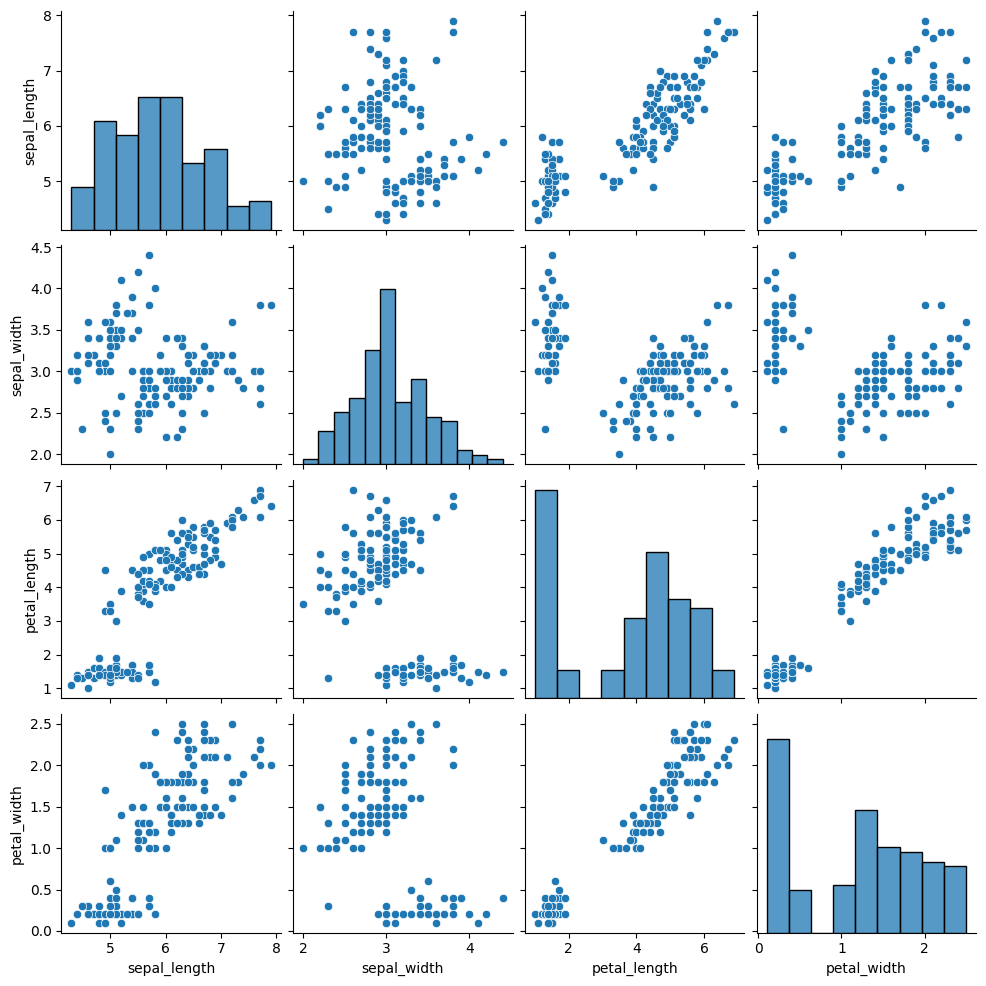

In [8]:
sns.pairplot(df);

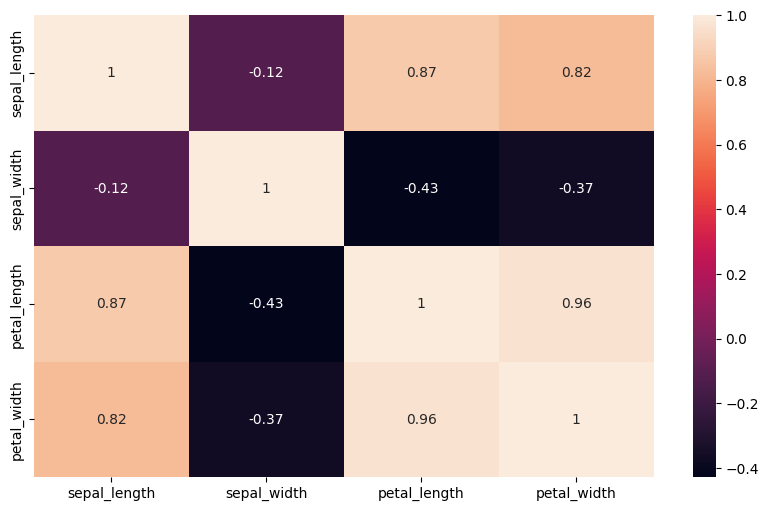

In [9]:
sns.heatmap(df.corr(), annot =True);

In [10]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

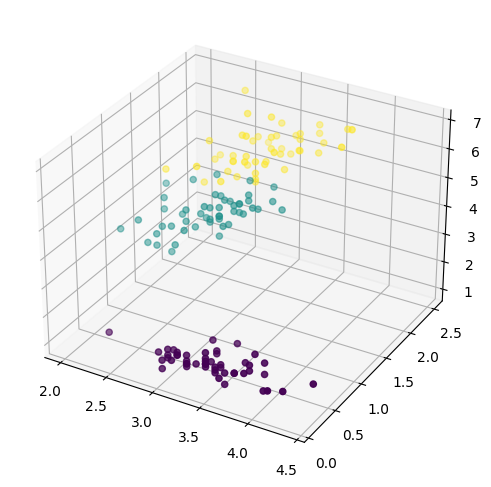

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

In [12]:
import plotly.express as px

In [13]:
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig = px.scatter_3d(df, x="sepal_width", y="petal_width", z="petal_length", color=colors)
fig.show()

## Train | Test Split and Scaling

In [14]:
X = df.drop("species", axis = 1)
y = df["species"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\gulsah\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

### With Default Parameters

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

* **Not**:Tahminlere bakın şimdi 0 lar 1 ler yok değil mi? Scikit learn ın bize sağladığı bir imkan. Target label nümerik olmasa bile model çalışır.Ama sadece Target label de.

* bakın olasılıklarda her bir satırda 3 eleman var bunların hangi class olarak tahmin edilidiği bu olasılıklara göre yapılıyor.

* burada binary deki gibi bir teshold yok yani 0,5 üzeri diye bir durum söz konusu değil burada hangisi yüksekse o seçiliyor. Binary ile multiclass ın farkı bu

In [22]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

In [23]:
np.set_printoptions(suppress=True) # Enes Hocamın katkılarıyla
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99757495, 0.00242504, 0.00000002],
       [0.9926298 , 0.00737006, 0.00000013],
       [0.97379085, 0.02620667, 0.00000248],
       [0.00040285, 0.35459901, 0.64499814],
       [0.00914885, 0.85171494, 0.13913621],
       [0.00101797, 0.32877333, 0.6702087 ],
       [0.00061045, 0.64597443, 0.35341512],
       [0.00819191, 0.88679621, 0.10501188],
       [0.00022054, 0.18796252, 0.81181694],
       [0.91384821, 0.08614997, 0.00000181],
       [0.00073306, 0.16076205, 0.83850489],
       [0.9979504 , 0.00204959, 0.00000001],
       [0.94031798, 0.05967979, 0.00000223],
       [0.00000178, 0.02641465, 0.97358358],
       [0.00571833, 0.38926375, 0.60501793],
       [0.01355839, 0.90499146, 0.08145015],
       [0.09631033, 0.8461217 , 0.05756797],
       [0.05140098, 0.87502542, 0.0735736 ],
       [0.98454068, 0.01545908, 0.00000025],
       [0.00127726, 0.51172993, 0.48699281],
       [0.01855758, 0.94811058, 0.03333184],
       [0.98690353, 0.01309631, 0.00000015],
       [0.

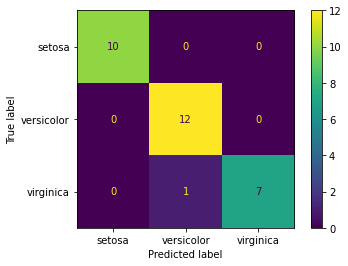

In [24]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

# Iris Veri Seti ve Confusion Matrix Analizi

Iris veri seti, çok sınıflı (multi-class) bir sınıflandırma problemi için kullanılan klasik bir veri setidir. Bu veri setinde, üç farklı Iris çiçeği türü (Iris setosa, Iris versicolor, Iris virginica) sınıflandırılmaktadır. Sınıflandırma performansının değerlendirilmesinde kullanılan confusion matrix, modelin her bir sınıfı ne kadar iyi ayırt ettiğini gösteren önemli bir araçtır.

## Confusion Matrix'in Yapısı

Confusion matrix, 3x3'lük bir matristir ve her bir sınıfın diğer sınıflarla nasıl karıştırıldığını gösterir. Her satır gerçek sınıfı (actual class), her sütun ise tahmin edilen sınıfı (predicted class) temsil eder.

### Iris versicolor için Confusion Matrix Analizi

- **True Positive (TP) için Iris versicolor**: Modelin gerçekten Iris versicolor olan örnekleri doğru bir şekilde Iris versicolor olarak sınıflandırması. Confusion matrix'te, Iris versicolor satırı ve sütunu kesiştiğindeki hücre, TP sayısını gösterir.
- **False Positive (FP) için Iris versicolor**: Modelin Iris versicolor olmayan örnekleri (yani Iris setosa veya Iris virginica) yanlışlıkla Iris versicolor olarak sınıflandırması. Confusion matrix'te, Iris versicolor sütunu ancak Iris versicolor dışındaki satırlar FP sayılarını gösterir.
- **False Negative (FN) için Iris versicolor**: Modelin gerçekten Iris versicolor olan örnekleri yanlışlıkla başka bir sınıfa ataması. Confusion matrix'te, Iris versicolor satırı ancak Iris versicolor dışındaki sütunlar FN sayılarını gösterir.

Bu analiz, modelin Iris versicolor sınıfını ne kadar iyi ayırt edebildiğini değerlendirmek için kullanılır. Confusion matrix'in Iris versicolor için TP, FP ve FN hücreleri, modelin bu spesifik sınıf üzerindeki performansını somut bir şekilde gösterir.

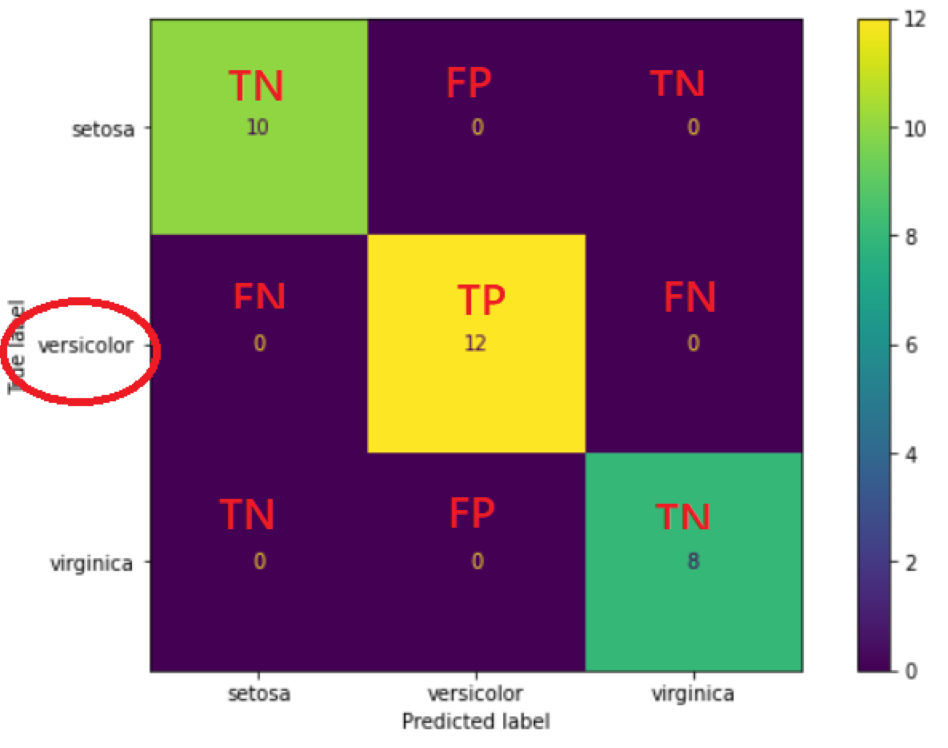

In [25]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [26]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## Cross Validate

In [27]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

## Cross Validate for versicolor

* **Not-1**: Binary de model sadece bir classa göre bakıyordu burada ise bütün classları aynı kabul edip sadece macro, micro(accuracy), weight e bakmanıza izin veriyor. Bu sebeple bizim için öenmli olan bir class varsa şu şekilde bir işlem yapabiliyoruz.

* **Not-2**: Bu kodda istediğimiz bir class ın CV skorlarına bakmak için kullanılıyor. burada post label yerine labels kullanıyoruz. Post label gitti labels geldi. Unutmayalım labels gelince **average** belirtmemizi de ister bu sebeple bunu belirteceğiz.

In [28]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

In [29]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

## Class prediction

In [30]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(20)

sepal_length  sepal_width  petal_length  petal_width     species  \
25          5.000        3.000         1.600        0.200      setosa   
74          6.400        2.900         4.300        1.300  versicolor   
64          5.600        2.900         3.600        1.300  versicolor   
50          7.000        3.200         4.700        1.400  versicolor   
31          5.400        3.400         1.500        0.400      setosa   
90          5.500        2.600         4.400        1.200  versicolor   
42          4.400        3.200         1.300        0.200      setosa   
32          5.200        4.100         1.500        0.100      setosa   
146         6.300        2.500         5.000        1.900   virginica   
97          6.200        2.900         4.300        1.300  versicolor   
53          5.500        2.300         4.000        1.300  versicolor   
129         7.200        3.000         5.800        1.600   virginica   
48          5.300        3.700         1.500        0.200      setosa   
43          5.000        3.500         1.600        0.600      setosa   
122         7.700        2.800         6.700        2.000   virginica   
88          5.600        3.000         4.100        1.300  versicolor   
147         6.500        3.000         5.200        2.000   virginica   
68          6.200        2.200         4.500        1.500  versicolor   
16          5.400        3.900         1.300        0.400      setosa   
134         6.100        2.600         5.600        1.400   virginica   

           pred  pred_proba_setosa  pred_proba_versicolar  \
25       setosa              0.882                  0.118   
74   versicolor              0.014                  0.905   
64   versicolor              0.100                  0.866   
50   versicolor              0.009                  0.852   
31       setosa              0.940                  0.060   
90   versicolor              0.022                  0.894   
42       setosa              0.985                  0.015   
32       setosa              0.998                  0.002   
146   virginica              0.000                  0.188   
97   versicolor              0.019                  0.898   
53   versicolor              0.008                  0.887   
129   virginica              0.000                  0.355   
48       setosa              0.987                  0.013   
43       setosa              0.974                  0.026   
122   virginica              0.000                  0.026   
88   versicolor              0.096                  0.846   
147   virginica              0.001                  0.161   
68   versicolor              0.001                  0.646   
16       setosa              0.993                  0.007   
134  versicolor              0.001                  0.512   

     pred_proba_virginica  
25                  0.000  
74                  0.081  
64                  0.035  
50                  0.139  
31                  0.000  
90                  0.084  
42                  0.000  
32                  0.000  
146                 0.812  
97                  0.082  
53                  0.105  
129                 0.645  
48                  0.000  
43                  0.000  
122                 0.974  
88                  0.058  
147                 0.839  
68                  0.353  
16                  0.000  
134                 0.487

## With Best Parameters (GridsearchCV)

Bakın daha önce söylemiştim log reg kendi içinde bir regularizasyon yapıyordu. Buradada shift tab tab ile modelin içine girdiğimde penalty diye bir parametrem var bunun default olarak l2 (ridge) olduğunu görüyorum. Kısaca ekstra bir regularizasyon modeli uygulamayacağım

başka hangi hyper parametreler var ona bakalım

**C**=regularizasyon kuvvetinin tersi kuvveti ile işlem yapıyor. değer büyüdükçe regularizasyon kuvvetim azalıyor küçüldükçe artıyor. Alphanın tersi

**class weight var**= labellardaki dengesizliği nispeten gidermiş oluyor balanced dersek

**solver**= modelimizdeki optimizasyon işlemleri yapan parametreler solver içinde oluyor.

      solver default lbfgs
      küçük data setleri için liblinear
      multiclass için newton-cg, sag, saga ve lbfgs seçilebilir 
      
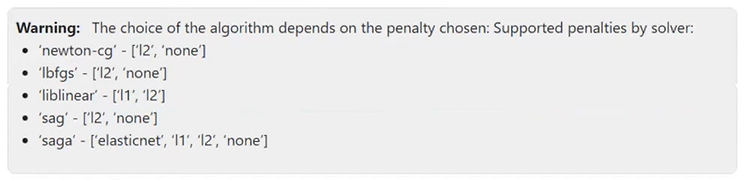
      
      
bakın burada dikkatimizi birşeye çekiyor yukarıda optimizasyon parametreleri neler ile kullanılır mış bunu görüyoruz

max iteri biliyoruz zaten yapılacak iterasyon sayısna göre karar veriyorduk default 100 dü

**multiclass** = burada default auto eğer defaultu auto olan bir parametre görürseniz bırakın öyle kalsın o zaten en uygun olanı bulur. Ama domain knowledge adına buna bir bakalım içinde var olanlar;

**ovr** = binary gibi davranır yani hedef clasını bir tanesi olarak seçer diğerlerini 0 olarak kabul eder buna göre işlem yapar.

multinominal ise datanın hepsine göre işlem yapar.

**l1_raito** = eğer elastic net ile modele girecekseniz bunu kullanmak gerekiyor bunu zaten biliyoruz

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Parametreler için ekstra bilgi

**penalty:** Kullanılacak düzenlileştirme türünü belirtir. 'l2' penalty, Ridge regularization anlamına gelir ve overfitting'i önlemek için modelin karmaşıklığını azaltır.

**dual:** Dual veya primal formülasyonun kullanılıp kullanılmayacağını belirtir. Genellikle, örnek sayısı özellik sayısından fazla olduğunda primal formülasyon tercih edilir.

**tol:** Optimizasyonun durdurulması için kullanılan tolerans değeridir. Algoritma, belirlenen bu değer kadar iyileşme sağlanamadığında iterasyonu durdurur.

**C:** Düzenlileştirme gücünün tersini belirtir. Daha düşük C değerleri modelin aşırı uyuma (overfitting) karşı daha dayanıklı olmasını sağlar, ancak aynı zamanda underfitting riskini artırabilir.

**fit_intercept:** Bir kesme terimi (intercept) eklenip eklenmeyeceğini belirler. Genellikle, veri merkezlenmediyse bu parametre True olarak ayarlanır.

**intercept_scaling:** Sadece 'liblinear' solver kullanılırken önemlidir ve kesme teriminin ölçeklenmesini belirler.

**class_weight:** Sınıfların ağırlıklarını belirler. Özellikle dengesiz veri setlerinde faydalıdır. 'None' olarak ayarlandığında, tüm sınıflar eşit ağırlıkta kabul edilir.

**random_state:** Şayet sayısal bir değer verilirse, rastgele sayı üretecinin tohum değerini belirler. Bu, modelin tekrarlanabilir olmasını sağlar.

**solver:** Optimizasyon problemi çözmek için kullanılan algoritmayı belirtir. 'lbfgs' genellikle küçük ve orta ölçekli veri setleri için iyi çalışır.

**max_iter:** Optimizasyon algoritmasının maksimum iterasyon sayısını belirtir.

**multi_class:** Birden fazla sınıfı olan sınıflandırma problemlerinde kullanılır. 'auto' olarak ayarlandığında, veriye ve diğer parametrelere bağlı olarak 'ovr' (one-vs-rest) veya 'multinomial' seçeneği otomatik olarak seçilir.

**verbose:** Çalışma sırasında yazdırılacak metinlerin detay düzeyini belirtir.

**warm_start:** True olarak ayarlandığında, önceki çağrıdaki çözümü kullanarak eğitime devam eder, bu da bazı durumlarda hız kazandırabilir.

**n_jobs:** Eş zamanlı işlem sayısını belirtir. None olarak ayarlandığında, işlemci çekirdeklerinin tümü kullanılmaz.

**l1_ratio:** 'elasticnet' penalty kullanıldığında, L1 ve L2 düzenlileştirmeleri arasındaki oranı belirtir. Bu parametre yalnızca 'saga' solver ile birlikte kullanılabilir.

In [31]:
log_model = LogisticRegression(max_iter = 5000)

In [32]:
penalty =["l2", "l1"]
C = np.logspace(-1, 5, 20)
#solver = ["sag", "saga", "liblinear", "lbfgs"] "solver":solver,
param_grid = {"penalty" : penalty,
              "C" : C}

In [33]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv = 5)

In [34]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([     0.1       ,      0.20691381,      0.42813324,      0.88586679,
            1.83298071,      3.79269019,      7.8475997 ,     16.23776739,
           33.59818286,     69.51927962,    143.84498883,    297.63514416,
          615.84821107,   1274.2749857 ,   2636.65089873,   5455.59478117,
        11288.37891685,  23357.2146909 ,  48329.30238572, 100000.        ]),
                         'penalty': ['l2', 'l1']})

In [35]:
grid_model.best_params_

{'C': 16.23776739188721, 'penalty': 'l2'}

In [36]:
grid_model.best_score_

0.9666666666666668

In [37]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

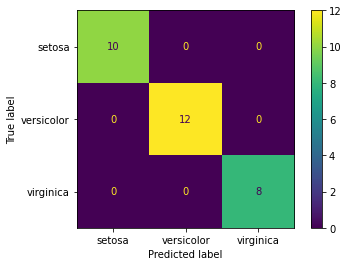

In [38]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

In [39]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [41]:
from sklearn.metrics import plot_roc_curve

In [42]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

* roc auc malum binary model de çalışmakta burada targetımız ikiden fazla class içerdiğinden hata veriyor bunun manuel olarak yapımı olabilir yani öncelikle hedef classımızı 1 yapıp diğer iki tanesini 0 yaparak bunu tüm classlar için uygulayabilirim bu şekilde aldığım skorları yorumlayabilirim.Ancak bununla uğraşmayacağız. Bunun için yellow brick imdadımıza yetişiyor.

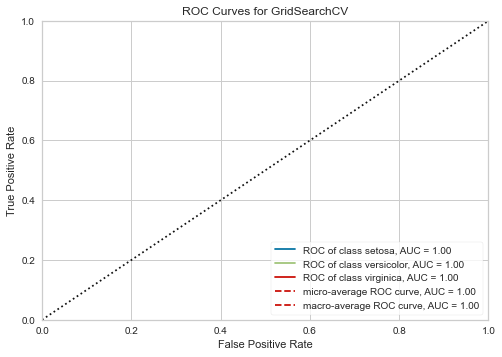

In [43]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();  

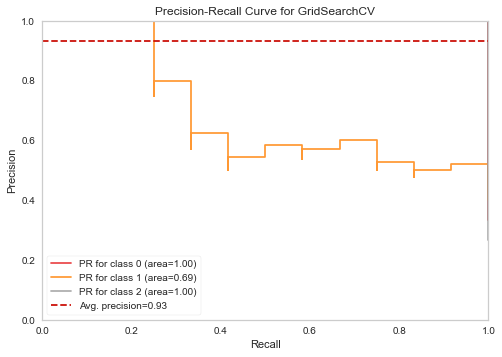

In [44]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

* **Not**: bakın burada classın 1 tanesini 0,69 olarak vermiş. Bu durum bize dengeli sınıflarda neden precision recall curve in kullanılmaması gerektiğini ispat ediyor. Ben biliyorumki modelim hataya yer bırakmayacak derecede %100 doğru tahmin yapıyor.

O yüzden dengeli sınıflarda ROCAUC dengesiz sınıflarda precision recall curve kullanılıyor.

## Final Model and Model Deployment

In [45]:
scaler = StandardScaler().fit(X)

In [46]:
import pickle
pickle.dump(scaler, open("scaler_iris", "wb"))

In [47]:
X_scaled = scaler.transform(X)

In [48]:
final_model = LogisticRegression(C= 16.23776739188721, penalty= "l2").fit(X_scaled, y)

In [49]:
pickle.dump(final_model, open("final_model_iris", "wb"))

## New Data

In [50]:
X.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [51]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [52]:
sample = pd.DataFrame(my_dict)

In [53]:
sample

sepal_length  sepal_width  petal_length  petal_width
0         4.500        2.200         1.300        0.200
1         5.800        3.000         4.300        1.300
2         7.500        4.200         6.500        2.300

In [54]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [55]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

array([[-1.62768839, -1.97355361, -1.39706395, -1.3154443 ],
       [-0.05250608, -0.13197948,  0.30805885,  0.13250973],
       [ 2.00734772,  2.63038172,  1.55848225,  1.44883158]])

In [56]:
final_model =pickle.load(open("final_model_iris", "rb"))

In [57]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [58]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

sepal_length  sepal_width  petal_length  petal_width        pred  \
0         4.500        2.200         1.300        0.200      setosa   
1         5.800        3.000         4.300        1.300  versicolor   
2         7.500        4.200         6.500        2.300   virginica   

   pred_proba_setosa  pred_proba_versicolor  pred_proba_virginica  
0              0.905                  0.095                 0.000  
1              0.004                  0.993                 0.003  
2              0.000                  0.001                 0.999

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Multiclass (Iris Data Set)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/)